Initializing

In [256]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

# **AWS SaaS Sales**
---


This notebook is a Data Analytics project on the publicly available dataset containing ficticous transactions data of Software-as-a-Service (SaaS) companies trading at Amazon Web Services (AWS). The SaaS products inside this dataset are mainly B2B Sales and Marketing software.

The dataset that is being used in this projects are available at [this link](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).


### **Domain Understanding**
---
**What is SaaS?**  <br>

According to the [Amazon website](https://aws.amazon.com/what-is/saas/), *Software-as-a-service* is a cloud based software model that delivers applications to end-users through an internet browser. Basically SaaS vendors architect and host the services to gives computational service for the end-consumer to access on demand. 

SaaS is one of the main models for cloud computing, alongside Platform as a Service (PaaS) and Infrastructure as a Service (IaaS). 

**What is Amazon Web Services (AWS)?**<br>

AWS is Amazon's cloud-computing product. AWS is a platform that is designed for vendors to host application, offering products like SaaS, PaaS and IaaS services from data centers globally.

**How does the vendor and user transaction occured?**


### **Data Characteristics**
---
In this section we will break down the characteristics of the dataset, and how can we wrangle the data to become more efficient to analyze and models.

In [257]:
# loading the data
data = pd.read_csv('data/SaaS-Sales.csv')
df = pd.DataFrame(data)
display(
df.head(),
df.shape,)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


(9994, 19)

In [258]:
print(f'''Date Range:
{df['Order Date'].min()} - {df['Order Date'].max()}''')

Date Range:
1/1/2023 - 9/9/2023


After extracting from csv files and briefly looking at the data, we can conclude a few insights:

1. The data contains 9.994 transactions (row).
2. The data transaction's order date are ranging from 1st January 2023 to 9th Septeber 2023.
3. The datasets contains three main data aspects:

    - **Financial Data** : This data is useful to track the **profitability** of each product and transactions.
    - **Geographical Data** : We can use this to make prediction and analysis of **where** is the best place for marketing a certain product.
    - **Timing Data** : We can use this to make prediction and analysis of **when** is the best place for marketing a certain product.

    > These features are going to be explained individually in the next sub-chapter.

### **Data Features**
---

To understand the data better, we are going to create and index table, containing the characteristics of each features.

In [259]:
column_name = []
dtype = []
nunique = []
nanvalues = []
example = []
range = []

for col in df.columns:
    column_name.append(col)
    dtype.append(df[col].dtypes)
    nunique.append(df[col].nunique())
    nanvalues.append(df[col].isna().sum())
    if len(list(df[col].unique())) > 4:
        example.append(list(df[col].unique()[0:4]))
    else:
        example.append(list(df[col].unique()))

    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        range.append(f'{df[col].min().round()}-{df[col].max().round()}')
    else:
        range.append('-')

data_index = pd.DataFrame({'Column':column_name, 'dtypes':dtype, 'nunique':nunique, 'NaN':nanvalues,'Range':range,'example':example})
data_index

,Column,dtypes,nunique,NaN,Range,example
0,Row ID,int64,9994,0,1-9994,"[1, 2, 3, 4]"
1,Order ID,object,5009,0,-,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812]"
2,Order Date,object,1237,0,-,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020]"
3,Date Key,int64,1237,0,20200104-20231231,"[20221109, 20220613, 20211011, 20200609]"
4,Contact Name,object,793,0,-,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges]"
5,Country,object,48,0,-,"[Ireland, United States, Germany, Sweden]"
6,City,object,262,0,-,"[Dublin, New York City, Stuttgart, Stockholm]"
7,Region,object,3,0,-,"[EMEA, AMER, APJ]"
8,Subregion,object,12,0,-,"[UKIR, NAMER, EU-WEST, NOR]"
9,Customer,object,99,0,-,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas]"


As seen on the feature index table above, most of the data are in the shape of objects, with the some numerical value and unconverted datetime data. 

The dataset contains no missing value, although the order ID's unique value are not equal to the number od rows, this could means that there are some duplicated data.

In [260]:
df.duplicated(subset='Order ID').sum()

4985

In [261]:
df[df.duplicated(subset='Order ID')].sort_values(by='Order ID').head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6288,6289,AMER-2020-100090,7/8/2020,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,196.704,6,0.2,68.8464
3836,3837,AMER-2020-100363,4/8/2020,20200408,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,19.008,3,0.2,6.8904
6317,6318,AMER-2020-100762,11/24/2020,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,Support,5F2LX40BDP,15.960,2,0.0,7.9800
6316,6317,AMER-2020-100762,11/24/2020,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,Support,V5SQA48WYZ,144.120,3,0.0,69.1776
6315,6316,AMER-2020-100762,11/24/2020,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,FinanceHub,QLK9TG5206,196.620,2,0.0,96.3438


In [262]:
df.duplicated().sum()

0

As we can see that the statement of duplicated data are turning out to be incorrect, the similar Order ID are refering to different products ordered at the same time. In conclusion, the dataset are valid and free from duplicated data.

### **Converting Date Time Values**
---

Currently the `Order Date` feature are still in object format. Although this format already given us all the date information we need, converting it to a datetime format will give us option to explore the data further in the analysis stage.

In [263]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [264]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [265]:
display(
    df.head(),
    df['Order Date'].dtypes)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


dtype('<M8[ns]')

### **Feature Selection**
---
The dataset holds many feature, to make our analysis more efficient we need to filter whether or not each features are important to our analysis. If the feature turns out to be irrelevant, we can drop it to reduce the dimension of the dataset.

| #   | Name of the attribute | Description                                          |
| --- | --------------------- | ---------------------------------------------------- |
| 1   | Row ID                | A unique identifier for each transaction.            |
| 2   | Order ID              | A unique identifier for each order.                  |
| 3   | Order Date            | The date when the order was placed.                  |
| 4   | Date Key              | A numerical representation of the order date (YYYYMMDD). |
| 5   | Contact Name          | The name of the person who placed the order.         |
| 6   | Country               | The country where the order was placed.              |
| 7   | City                  | The city where the order was placed.                 |
| 8   | Region                | The region where the order was placed.               |
| 9   | Subregion             | The subregion where the order was placed.            |
| 10  | Customer              | The name of the company that placed the order.       |
| 11  | Customer ID           | A unique identifier for each customer.               |
| 12  | Industry              | The industry the customer belongs to.               |
| 13  | Segment               | The customer segment (SMB, Strategic, Enterprise, etc.). |
| 14  | Product               | The product was ordered.                             |
| 15  | License               | The license key for the product.                     |
| 16  | Sales                 | The total sales amount for the transaction.         |
| 17  | Quantity              | The total number of items in the transaction.       |
| 18  | Discount              | The discount applied to the transaction.            |
| 19  | Profit                | The profit from the transaction.                    |


From the explanation above there are a few features that we are going to eliminate:

- `Date Key` = This feature represents the `Order Date` feature in a different format, the information that we needed already exist without this feature.
- `License` = This feature shows the licence key of the product for the user to use, this does not concern us.

In [266]:
df.drop(columns=['Date Key','License'], inplace=True)

### **Outliers**
---
Outliers could be useful or catastrophic towards a dataset analytics.

In [267]:
financial = ['Sales', 'Quantity','Discount', 'Profit']

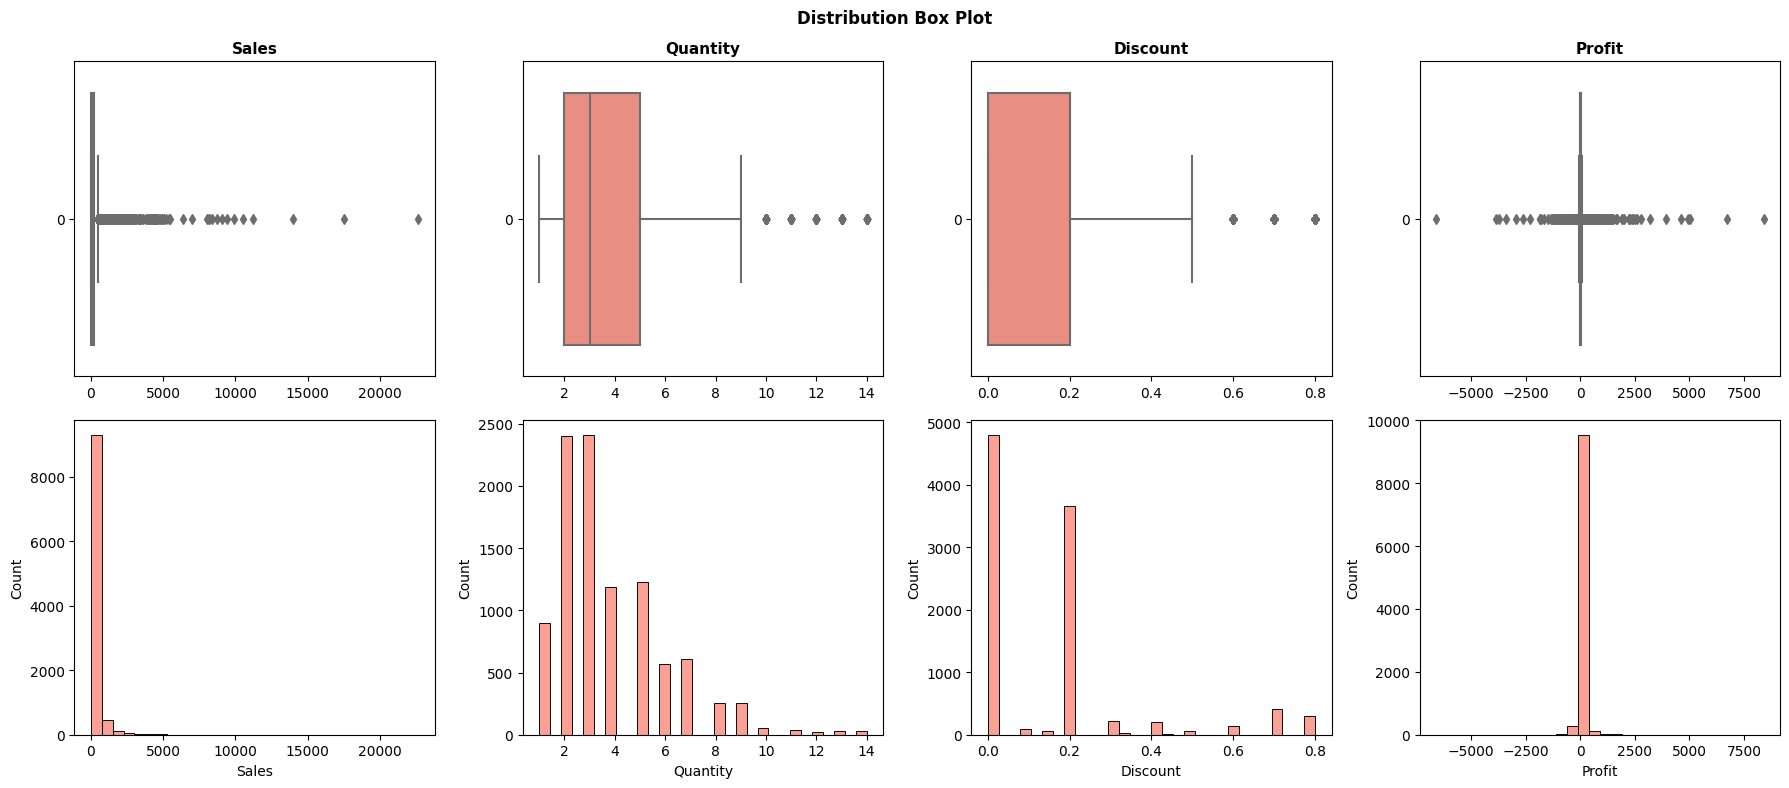

In [268]:
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
plt.suptitle('Distribution Box Plot', fontsize=12, fontweight='bold')
axs = axs.flatten()
for i, col in enumerate(financial):
    axs[i].set_title(f'{col.capitalize()}', fontsize=11, fontweight='bold')
    sns.boxplot(data=df[col], ax=axs[i], orient='h', color='salmon')
for i, col in enumerate(financial):
    sns.histplot(data=df[col], ax=axs[i+4], color='salmon', bins=30)
plt.tight_layout()
plt.show()

As you can see from the boxplots above the data contains many outliers, ecspecially in the `Sales` and `Profit` features, making the distribution plot relatively unreadable. This could give us a hardtime while analyzing and modeling the data in the future. To mitigate this, we can use the **winsorize** method.

***Winsorizing*** is a statistical data transformation technique that involves replacing extreme values in a dataset with a lower and upper bound, typically by setting them to a specified percentile threshold. 

For this data, we are going to use the `scipy` module to set the outliers to a lower bound of 5% and upper bound of 95%.




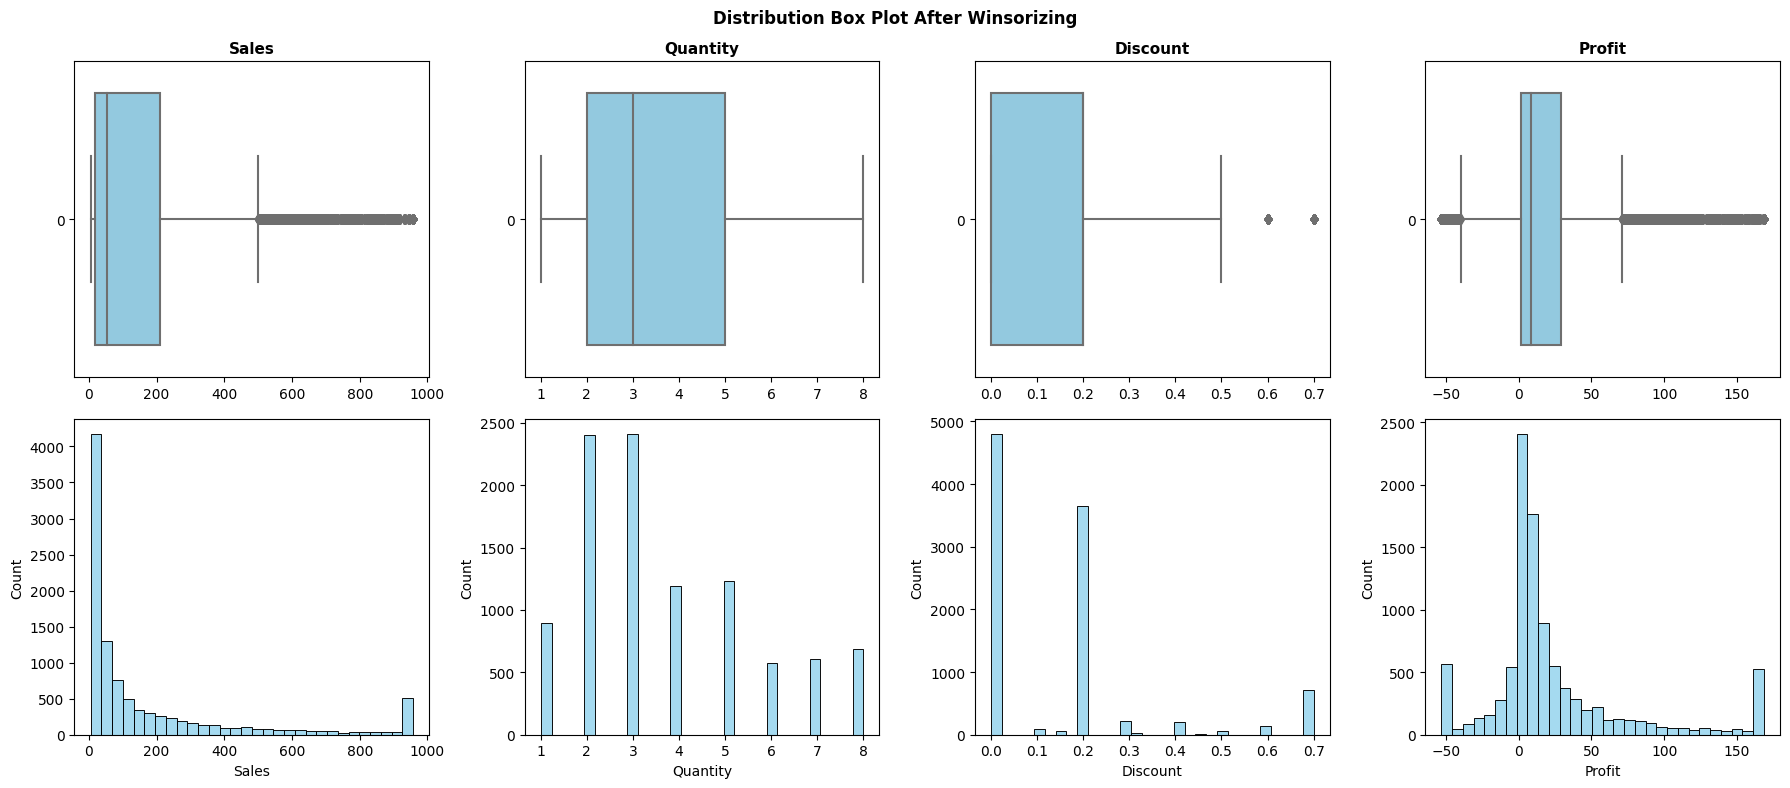

In [269]:
from scipy.stats.mstats import winsorize

df2 = df.copy() # making a new df2 variable, so it does not change the original variable
for col in financial:
    df2[col] = winsorize(df2[col], limits=[0.05, 0.05])  

fig, axs = plt.subplots(2, 4, figsize=(18, 8))
plt.suptitle('Distribution Box Plot After Winsorizing', fontsize=12, fontweight='bold')
axs = axs.flatten()
for i, col in enumerate(financial):
    axs[i].set_title(f'{col.capitalize()}', fontsize=11, fontweight='bold')
    sns.boxplot(data=df2[col], ax=axs[i], orient='h', color='skyblue')

for i, col in enumerate(financial):
    sns.histplot(data=df2[col], ax=axs[i+4], color='skyblue', bins=30)
plt.tight_layout()
plt.show()

Now that the outliers are handled, the distribution plot are clearer and can be analyzed with ease. <br>

The boxplot now show a more strict range within the feature. Yes, there are still outliers visible, but looking towards the objective of the features above, these outlier might be useful in the analysis stage. In the `Profit` features however gives a negative value data, this could mean that the price of the product that are being sold is less then the cost of goods.

And from the distribution of each features, we can see that most of data are right-skewed (positive-skew), meaning that it is more likely the mode transaction are occuring with the value less than the median. This kind of distribution are common in data that has to do with financial features.

### **Load Data to CSV**
---


In [270]:
df2.to_csv(r'data/saas-dataset(cleaned).csv', header=True)